# Data Visualization

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plotlyset up
import plotly.offline as py
import plotly.tools as tls
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import seaborn as sns
# packages for word cloud
from wordcloud import WordCloud,ImageColorGenerator
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# import datasets
df = pd.read_csv('Data/cleaned-data.csv')
train = pd.read_csv('Data/Row-data/train.csv')

In [3]:
# drop unuseful columns for visualization
df = df.drop(['DataType','Description','PetID'], axis = 1)

In [ ]:
# Correlation among variables
# get some idea of top 3 variables I am going to analyze more than other variables
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(corr)] = False
sns.heatmap(data=corr,mask=mask,annot=True,linewidths=.5,square=True)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.title('correlation among variables.png')
plt.savefig("correlation-among-variables.png", bbox_inches="tight", dpi=100)
plt.show() 

/Users/elainny/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.



In [ ]:
#Adoption Speed vs Age plot
import plotly
tls.set_credentials_file(username='wawafish',api_key='haNTorCiWdKfafDOiZCh')

data_age = []
for i in range(5):
    datax = df.loc[df['AdoptionSpeed'] == 2]
    data = df.loc[df['AdoptionSpeed'] == i]
    data_age.append(go.Scatter(
        x = datax['Age'].value_counts().sort_index().index,
        y = data['Age'].value_counts().sort_index().values,
        mode = str(i),
        name = str(i)))
    

layout = dict(title = 'Adoption Speed vs Age',
              yaxis = dict(title = 'Count', zeroline = False),
              xaxis = dict(title = 'Age in months', zeroline = False))

fig = dict(data=data_age, layout = layout)
py.iplot(fig, filename = 'basic-line')

In [ ]:
# Total Adoption Speed
import plotly
tls.set_credentials_file(username='wawafish',api_key='haNTorCiWdKfafDOiZCh')

labels = ['Not being adopted','adopted within 2-3 months','adopted within 1st month',
          'adopted within 1st week','same day adoption']
values = list(df['AdoptionSpeed'].value_counts())
colors = ['#ffe6e6', '#fcf8c1', '#defcce', '#e9dbf9','#ceeef9']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors))

py.iplot([trace], filename='styled_pie_chart')

In [ ]:
# Top 7 popular combinations of gender and type
df['Color'] = (df['Color1'] + '/' + df['Color2'] + '/' + df['Color3']).replace(['//'], [' '])
for i in df['Type'].unique():
    for gender in df['Gender'].unique():
        data_color = df.loc[(df['Type'] == i) & (df['Gender'] == gender)]
        top7_colors = list(data_color['Color'].value_counts().index)[:7]
        print(f"Top 5 popular colors of {gender} {i}s: {' '.join(top7_colors)}")

/Users/elainny/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.



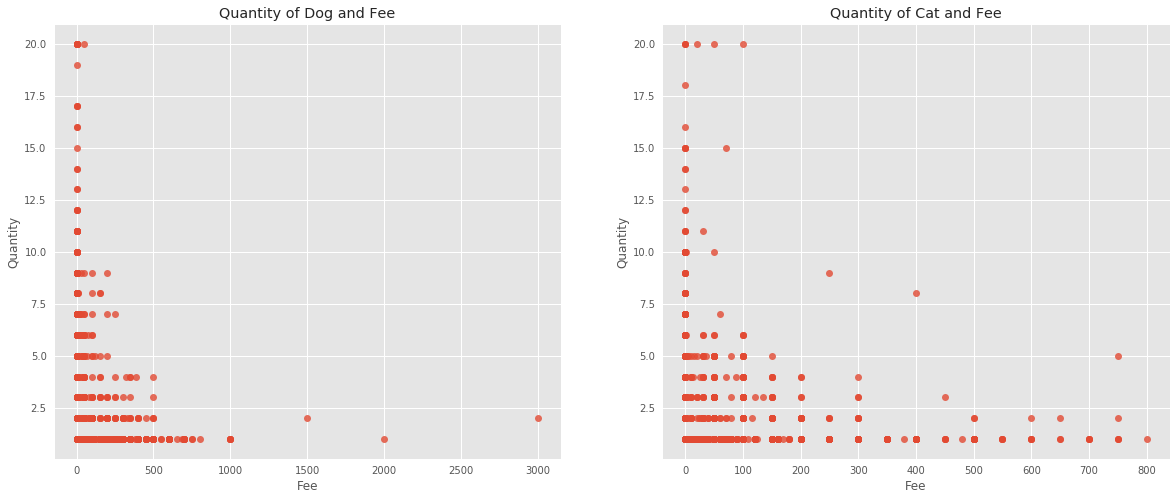

In [4]:
# plot for quantity vs fee
import seaborn as sns 
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.regplot(x="Fee", y="Quantity",data=df.loc[df['Type'] == 'Dog'], fit_reg=False)
plt.title('Quantity of Dog and Fee');

plt.subplot(1, 2, 2)
sns.regplot(x="Fee", y="Quantity",data=df.loc[df['Type'] == 'Cat'], fit_reg=False)
plt.title('Quantity of Cat and Fee');

plt.savefig('quantity-vs-fee.png')
plt.show()

## word cloud

In [ ]:
# word cloud: cat name
plt.figure(figsize=(20, 8))
bg_pic = imread('dog-paw.png')
image_colors = ImageColorGenerator(bg_pic)


cat_name = ' '.join(df.loc[df['Type'] == 'Cat', 'Name'].fillna('').values)
wc_cat = WordCloud(mask=bg_pic,background_color='white',scale=20,max_words=300).generate(cat_name)

plt.imshow(wc_cat.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('cat.png')
#plt.show()

In [ ]:
# word cloud: dog name
plt.figure(figsize=(20, 8))
dog_name = ' '.join(df.loc[df['Type'] == 'Dog', 'Name'].fillna('').values)
wc_dog = WordCloud(mask=bg_pic,background_color='white',scale=20,max_words=300).generate(dog_name)
plt.imshow(wc_dog.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('dog.png')
plt.show()

In [ ]:
# top 3 popular pet names sorted by adoption speed
print('Top 3 Most popular pet names and AdoptionSpeed: ')
for name in df['Name'].value_counts().index[:3]:
    print('top 3 names: %s' % name)
    print(df.loc[df['Name'] == name, 'AdoptionSpeed'].value_counts().sort_index())

In [ ]:
# pets without names vs adoption speed
df['No_name'] = 0
df.loc[df['Name'] == 'No name', 'No_name'] = 1

pd.crosstab(df['No_name'], df['AdoptionSpeed'], normalize='index')

In [ ]:
# the following pet names will have less possibility to be adopted.
less_adoption_name = []
for name in df['Name'].unique():
    if len(str(name)) <=3:
        less_adoption_name.append(name)

print(less_adoption_name)